In [1]:
import pandas as pd

In [2]:
df_insurance = pd.read_csv("./data/insurance.csv")
df = df_insurance.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
# convert columns that object data type to category
df.sex = df.sex.astype("category")
df.smoker = df.smoker.astype("category")
df.region = df.region.astype("category")  

In [9]:
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [11]:
smoker_data = df.groupby("smoker").mean().round(2)
smoker_data

,age,bmi,children,charges
smoker,,,,
no,39.39,30.65,1.09,8434.27
yes,38.51,30.71,1.11,32050.23


In [12]:
import seaborn as sns

In [13]:
sns.set_style("whitegrid")

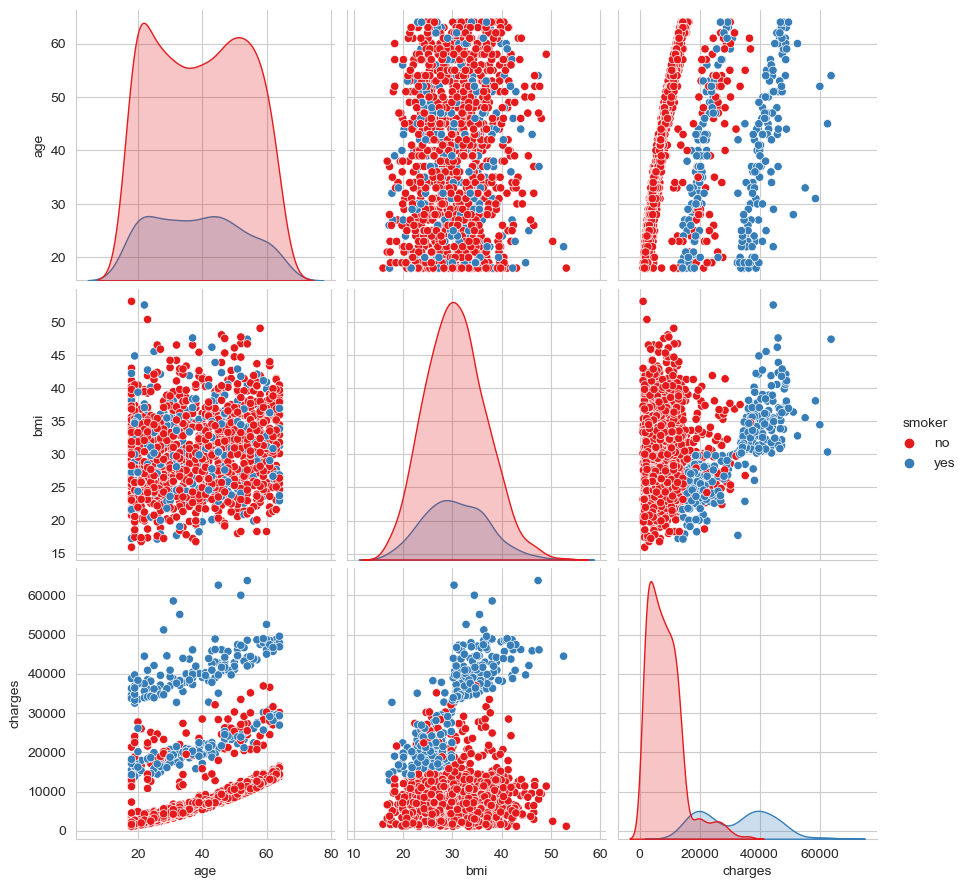

In [14]:
sns.pairplot(df[["age","bmi","charges","smoker"]], hue="smoker",height=3, palette="Set1")

In [17]:
sns.heatmap(df.corr(), annot = True);

In [19]:
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [20]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [21]:
df = pd.get_dummies(df)

In [22]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [23]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [26]:
y = df.charges
X = df.drop(["charges"], axis=1)

In [28]:
print(y.head())
print(X.head())

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64
   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0   19  27.900         0           1         0          0           1   
1   18  33.770         1           0         1          1           0   
2   28  33.000         3           0         1          1           0   
3   33  22.705         0           0         1          1           0   
4   32  28.880         0           0         1          1           0   

   region_northeast  region_northwest  region_southeast  region_southwest  
0                 0                 0                 0                 1  
1                 0                 0                 1                 0  
2                 0                 0                 1                 0  
3                 0                 1                 0                 0  
4                 0                 1                 0           

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80, random_state=42)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr = LinearRegression()

In [33]:
lr.fit(X_train, y_train)

LinearRegression()

In [37]:
lr.score(X_test,y_test).round(3) # r kare -> 0.7 den büyükse sonuc iyi

0.784

In [39]:
lr.score(X_train,y_train).round(3) # eger train verileri test'den daha yüksek çıksaydı overfitting olurdu yani ezberleme

0.742

In [40]:
y_pred = lr.predict(X_test)

In [42]:
from sklearn.metrics import mean_squared_error
import math

In [43]:
math.sqrt(mean_squared_error(y_test,y_pred))

5796.2846592762735

In [55]:
data_to_predict = X_train[100:101]
data_to_predict

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
716,49,22.61,1,1,0,1,0,0,1,0,0


In [56]:
lr.predict(data_to_predict)   

array([8336.85459226])

In [57]:
y_train[100:101]

716    9566.9909
Name: charges, dtype: float64